# Dimensional reduction and clustering 

In [1]:
# Seurat 
library(Seurat)

# Data 
library(dplyr)

# Plotting 
library(ggplot2)
library(patchwork)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [3]:
# Source files
source("plotting_global.R")

Loading required package: RColorBrewer



# Parameter setting

In [4]:
so_scvi_file <- "data/object/scvi.rds"
so_scvibatch_file <- "data/object/scvibatch.rds"

# Import data

In [ ]:
so_scvi <- readRDS(so_scvi_file)
so_scvibatch <- readRDS(so_scvibatch_file)

# Scaling

In [ ]:
so_scvi <- ScaleData(
  object          = so_scvi, 
  assay           = "SCVI", 
  vars.to.regress = NULL, 
  do.scale        = TRUE, 
  do.center       = TRUE
  )

In [ ]:
so_scvibatch <- ScaleData(
  object          = so_scvibatch, 
  assay           = "SCVI", 
  vars.to.regress = NULL, 
  do.scale        = TRUE, 
  do.center       = TRUE
  )

# Dimensional reduction and clustering

In [ ]:
source("bin/seurat_function.R")

In [ ]:
so_scvi <- dim_clust(
    # Seurat 
    so = so_scvi, 
    assay = "SCVI",
    # PCA features
    reduction = "scvi_latent", # Default name_pca
    blacklist_genes = NULL, 
    # Dim reduction
    dims_pca  = 30,  # Default 20 - RunPCA dims
    dims_umap = 10,  # Default NULL - RunUMAP dims 
    dims_tsne = 10,  # Default 1:5
    min_dist  = 0.3,  # Default 0.3  - RunUMAP dmin.ist - controls how tightly the embedding
    # Cluster 
    dims_cluster = 10,  # Default 1:10 - FindNeighbors dims  
    cluster_res  = 0.8 # Default 0.8 - FindClusters resoluton - above(below) 1.0 to obtain larger(smaller) number of communities)
)

# Reset main_labels factor level 
so_scvi$main_labels = factor(so_scvi$main_labels, levels = names(so_color$main_labels))

In [ ]:
so_scvibatch <- dim_clust(
    # Seurat 
    so = so_scvibatch, 
    assay = "SCVI",
    # PCA features
    reduction = "scvibatch_latent", # Default name_pca
    blacklist_genes = NULL, 
    # Dim reduction
    dims_pca  = 30,  # Default 20 - RunPCA dims
    dims_umap = 10,  # Default NULL - RunUMAP dims 
    dims_tsne = 10,  # Default 1:5
    min_dist  = 0.3,  # Default 0.3  - RunUMAP dmin.ist - controls how tightly the embedding
    # Cluster 
    dims_cluster = 10,  # Default 1:10 - FindNeighbors dims  
    cluster_res  = 0.8 # Default 0.8 - FindClusters resoluton - above(below) 1.0 to obtain larger(smaller) number of communities)
)

# Reset main_labels factor level 
so_scvibatch$main_labels = factor(so_scvibatch$main_labels, levels = names(so_color$main_labels))

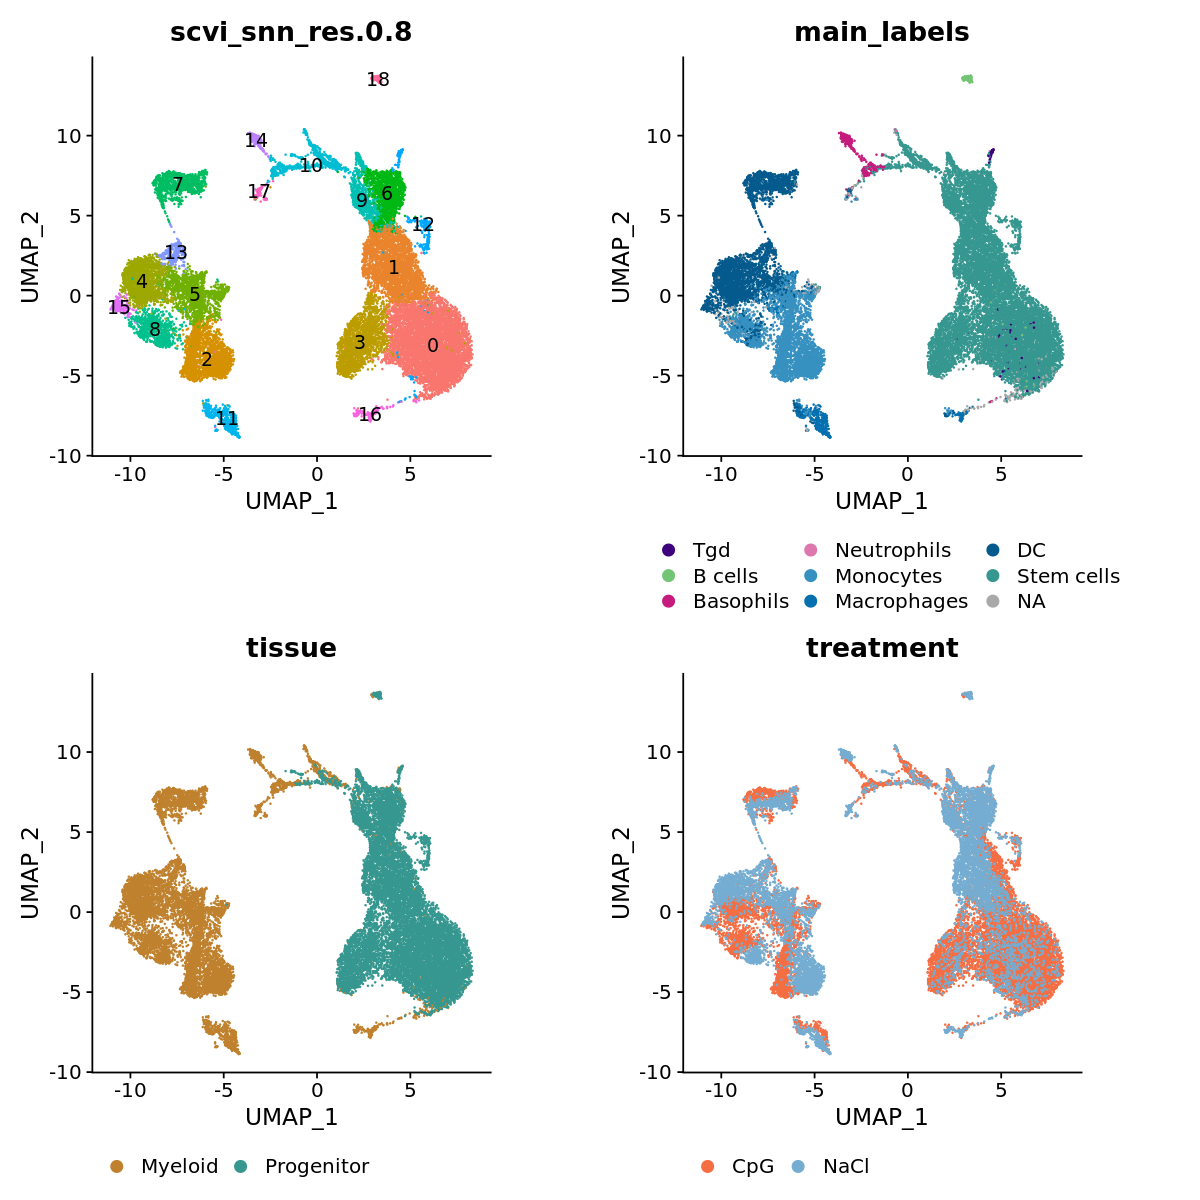

In [6]:
reduction <- "scvi_umap_nno"
dplot_1 <- DimPlot(so_scvi, reduction = reduction, group.by = "scvi_snn_res.0.8", label = TRUE) & 
    theme(aspect.ratio = 1, legend.position = "none")
dplot_2 <- DimPlot(so_scvi, reduction = reduction, group.by = "main_labels", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$main_labels, na.value = "dark gray") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))
dplot_3 <- DimPlot(so_scvi, reduction = reduction, group.by = "tissue", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$tissue, na.value = "dark gray") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))
dplot_4 <- DimPlot(so_scvi, reduction = reduction, group.by = "treatment", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$treatment, na.value = "dark gray") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))

options(repr.plot.width = 10, repr.plot.height = 10)
dplot <- dplot_1 + dplot_2 + dplot_3 + dplot_4 + plot_layout(ncol = 2)
dplot
ggsave(dplot, filename = "result/plot/seurat/dimplot_scvi_1.png", width = 9, height = 9)

In [ ]:
reduction <- "scvi_umap_nno"
dplot_1 <- DimPlot(so_scvibatch, reduction = reduction, group.by = "scvi_snn_res.0.8", label = TRUE) & 
    theme(aspect.ratio = 1, legend.position = "none")
dplot_2 <- DimPlot(so_scvibatch, reduction = reduction, group.by = "main_labels", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$main_labels, na.value = "dark gray") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))
dplot_3 <- DimPlot(so_scvibatch, reduction = reduction, group.by = "tissue", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$tissue, na.value = "dark gray") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))
dplot_4 <- DimPlot(so_scvibatch, reduction = reduction, group.by = "treatment", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$treatment, na.value = "dark gray") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))

options(repr.plot.width = 10, repr.plot.height = 10)
dplot <- dplot_1 + dplot_2 + dplot_3 + dplot_4 + plot_layout(ncol = 2)
dplot
ggsave(dplot, filename = "result/plot/seurat/dimplot_scvibatch_1.png", width = 9, height = 9)

# Save results

## Seurat objects

In [ ]:
saveRDS(so_scvi, so_scvi_file)
saveRDS(so_scvibatch, so_scvibatch_file)

## Cluster 

In [ ]:
write.table(so_scvi[["scvi_snn_res.0.8"]], "data/object/components/cluster/scvi_snn_res.0.8.txt", row.names = TRUE, sep = "\t")
write.table(so_scvibatch[["scvi_snn_res.0.8"]], "data/object/components/cluster/scvibatch_snn_res.0.8.txt", row.names = TRUE, sep = "\t")

# Session info

In [ ]:
sessionInfo()